# 第六章 逻辑斯蒂回归

通常，Logistic函数的定义如下： 
\begin{equation}
P(x) = \frac{1}{1+exp(-x)}
\end{equation}

其中$x \in \mathbb{R},P(x) \in [0,1]$

\begin{equation}
P(-x) = \frac{1}{1+exp(x)} = \frac{1}{1+\frac{1}{exp(-x)}} \nonumber \\
=\frac{exp(-x)}{1+exp(-x)} = 1-\frac{1}{1+exp(-x)} = 1-P(x)
\end{equation}

所以有以下性质：(之前我一直奇怪为啥wx前面少了个负号，后来才知道是化简过来的。。。)
\begin{equation}
P(y=1|w,x) = \frac{1}{1+exp(-w^Tx)} = \frac{exp(w^Tx)}{1+exp(w^Tx)} \\
P(y=0|w,x) = 1-\frac{1}{1+exp(-w^Tx)} = \frac{1}{1+exp(w^Tx)} 
\end{equation}

定义“几率”logit(p) = p/(1-p)

则对数几率 = log(p/(1-p))=wx 【后面会用到】

![avatar](img/p1.jpg)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

In [4]:
# 创建数据
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    return data[:,:2], data[:,-1]
X,Y = create_data()


In [5]:
class logisticRegression:
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def fit(self,X,Y,learning_rate = 0.0001):
        m = len(X)  #样本数量
        X = np.insert(X,0,1,axis=1)  #将wx+b里的b也纳入到w里面中来，添加一个x0=1,即w0+w1*x1+w2*x2 = w0*x0+w1*x1+w2*x2
        self.w = np.zeros(len(X[0]))  #初始化权重，为feature的数量
        for iter_time in range(500):  #进行几次epoch，调大epoch次数（比如5000），可以看到分离效果会更好
            for i in range(m):  #遍历每个样本
                gradient = X[i] * (Y[i]-self.sigmoid(np.dot(self.w,X[i])))  #梯度，注意这里wx算出来应该是一个数而不是一个向量，梯度推导可见上
                self.w += gradient  #使用梯度上升法最大化对数似然函数
        print("权重向量：",self.w)

In [6]:
clf = logisticRegression()
clf.fit(X,Y)

权重向量： [-91.56507325  63.10486613 -79.89033281]


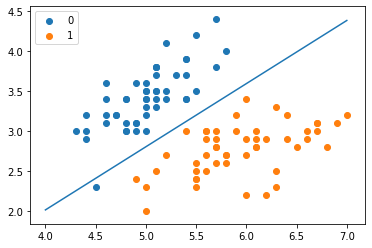

In [7]:
x_ponits = np.arange(4, 8)
# 绘制划分曲线为 w0+w1*x1+w2*x2=0,这里x1为x轴，x2为y轴，w0为b，可转化成截距式方程 x2 = (-w0-w1*x1)/w2
y_ = -(clf.w[1]*x_ponits + clf.w[0])/clf.w[2]
plt.plot(x_ponits, y_)

# 绘制样本点
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()